# Statistics
Statistics concerns itself with the collection, analysis, interpretation, presentation, and summarization of data.

"There are three kinds of lies: lies, damned lies, and statistics." - British Prime Minister Benjamin Disraeli, according to Mark Twain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# scipy.stats

In [2]:
from scipy import stats

## random variables
scipy.stats provides **many** distributions, both *continuous*:

http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-random-variables

and *discrete*:

http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-random-variables

Some well-known example distributions are the normal (`norm`), uniform (`uniform`), and the binomial (`binom`) distribution.

Often-used methods for continuous RVs are:

* rvs: Generate Random Variates
* pdf: Probability Density Function
* cdf: Cumulative Distribution Function
* ppf: Percent Point Function (Inverse of CDF)

In [3]:
n = stats.norm(loc=1, scale=1)  # normal distribution
n.cdf(1)  # also takes vector arguments

0.5

In [4]:
n.ppf(0.5)

1.0

In [5]:
u = stats.uniform(loc=0, scale=1)
u.mean()

0.5

In [6]:
n.rvs(size=5), u.rvs(size=5)

(array([ 0.18700852,  0.82659582, -1.23606696,  0.85466475,  0.26592878]),
 array([0.35754149, 0.07874068, 0.49555971, 0.43540264, 0.1856933 ]))

In [7]:
x = u.rvs(random_state=42)  # seeding random number generator for reproducability
print(x)  # should be 0.37454 and change

0.3745401188473625


In [8]:
data = [1, 2, 5, 6, 7, 9]
stats.describe(data)

DescribeResult(nobs=6, minmax=(1, 9), mean=5.0, variance=9.2, skewness=-0.1413225231876421, kurtosis=-1.2703213610586013)

4.998844250789079 1.0120808525127434


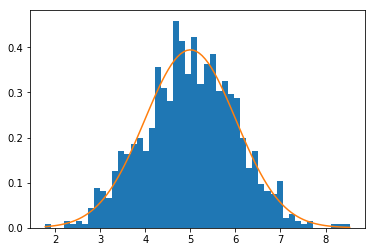

In [9]:
data = stats.norm.rvs(loc=5, scale=1, size=1000)  # try different distributions, e.g. arcsine, uniform
model = stats.norm  # try matching / non-matching distributions: norm / 

loc, scale = model.fit(data)
print(loc, scale)

plt.hist(data, 50, normed=True)
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, model(loc, scale).pdf(x));

## significance testing
If you need to test whether data is normally distributed, `normaltest` tests the null hypothesis that the sample comes from a normal distribution:

In [10]:
stats.normaltest(data)

NormaltestResult(statistic=0.4739416831753359, pvalue=0.7890142940863207)

The $p$-value is the probability of obtaining a result equal to or "more extreme" than what was actually observed, when the null hypothesis is true. For a typical analysis, using a standard $\alpha$ = 0.05 cutoff, the null hypothesis is rejected when $p$ < .05 (but this does *not prove* that the alternative hypothesis is true), and not rejected when $p$ > .05.

To test whether the *mean* of our sample data differs in a statistically significant way from the theoretical expectation, use the $t$-test:

In [11]:
stats.ttest_1samp(data, 5)

Ttest_1sampResult(statistic=-0.036093678132022924, pvalue=0.9712148738044961)

Specifically, this is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean.

Many other standard tests are available (e.g. Wilcoxon, Kolmogorov-Smirnov).

# statsmodels
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python. Features include:

* Linear regression models
* Generalized linear models
* Kernel density estimation
* Analysis of Variance (ANOVA)
* A wide range of statistical tests
* A collection of datasets for examples
* Input-output tools for producing tables in a number of formats (Text, LaTex, HTML)
* Plotting functions

Install it via

    conda install statsmodels

See also http://www.statsmodels.org.

In [12]:
import statsmodels.api as sm
sm.version.version

/Users/kain/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


'0.8.0'

## Linear Regression
Suppose the data consists of $n$ observations $\{\mathbf{x}_i, y_i\}_{i=1}^n$. Each observation includes a scalar response $y_i$ (also known as the regressand, endogenous or dependent variable) to a vector of p predictors (or regressors, exogenous, or independent variables) $\mathbf{x}_i = [x_1, x_2, \ldots, x_p]_i$. In a linear regression model the response variable is a linear function of the regressors:


   $y_i = \mathbf{x}_i^T \beta + \varepsilon_i, \forall i$
  
where
* $\beta$ is a $p\times1$ vector of unknown parameters
* $\varepsilon_i$ are unobserved scalar random variables (errors) which account for the discrepancy between the actually observed responses $y_i$ and the predicted outcomes $\hat{y} = \mathbf{x}_i^T \beta$. It is assumed that $\varepsilon \sim N(0, \sigma^2)$.
* T denotes matrix transpose, so that $\mathbf{x}_i^T \beta$ is the dot product between the vectors x and β.

This model can also be written in matrix notation as


   $\mathbf{y} = \mathbf{X}\beta + \mathbf\varepsilon,$
  
where $\mathbf{y}$ and $\mathbf\varepsilon$ are $n\times1$ vectors, and $\mathbf{X}$ is an $n×p$ matrix of regressors, which is also sometimes called the design matrix.

As a rule, a constant term is always included in the set of regressors, say, by taking $x_{i,1} = 1$ for all $i = 1, …, n$. The coefficient $\beta_1$ corresponding to this regressor is called the intercept.
### Ordinary Least Squares (OLS) estimation
This is used when it can be assumed that the errors are *independently* and *identically* distributed, i.e. $\Sigma = \mathbf{I}$.

In [13]:
# Make some artificial data
N = 40  # vary the number of data points
x = np.linspace(0, 10, N)
X = np.c_[x, x**2]
# alternative ways:
# X = np.column_stack((x, x**2))  
# X = np.vstack([x, x**2]).T
X = sm.add_constant(X)  # constant term to accomodate the intercept
X[:10]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.25641026, 0.06574622],
       [1.        , 0.51282051, 0.26298488],
       [1.        , 0.76923077, 0.59171598],
       [1.        , 1.02564103, 1.05193951],
       [1.        , 1.28205128, 1.64365549],
       [1.        , 1.53846154, 2.36686391],
       [1.        , 1.79487179, 3.22156476],
       [1.        , 2.05128205, 4.20775805],
       [1.        , 2.30769231, 5.32544379]])

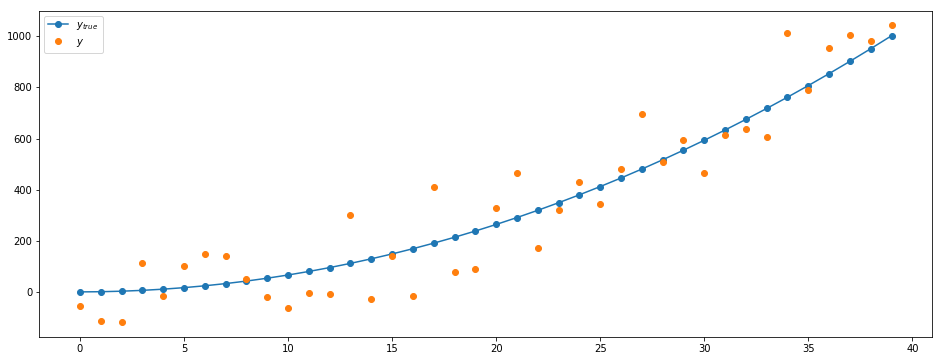

In [14]:
beta_true = np.array([1, 0.1, 10]) # let's create a linear relationship
y_true = X @ beta_true  # recall that `@` is matrix multiplication
e = stats.norm.rvs(loc=0, scale=100, size=len(X))  # vary the scale parameter
y = y_true + e  # adding noise

plt.figure(figsize=(16,6))
plt.plot(y_true, 'o-')
plt.plot(y, 'o')
plt.legend(['$y_{true}$', '$y$']);

In [15]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     158.9
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           6.87e-19
Time:                        16:10:53   Log-Likelihood:                -245.67
No. Observations:                  40   AIC:                             497.3
Df Residuals:                      37   BIC:                             502.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9902     52.820     -0.189      0.8

In [16]:
beta = result.params
beta  # compare to beta_true = np.array([1, 0.1, 10])

array([-9.99017174, -7.31375978, 11.45088142])

The *coefficient of determination*, denoted $R^2$ or $r^2$ and pronounced "R squared", is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable, thus giving some information about the goodness of fit of a model. In regression, $r^2$ is a statistical measure of how well the regression line approximates the real data points. An $r^2$ of 1 indicates that the regression line fits the data perfectly.

In [17]:
print(result.rsquared)  # how good is this fit?

0.8957165902513075


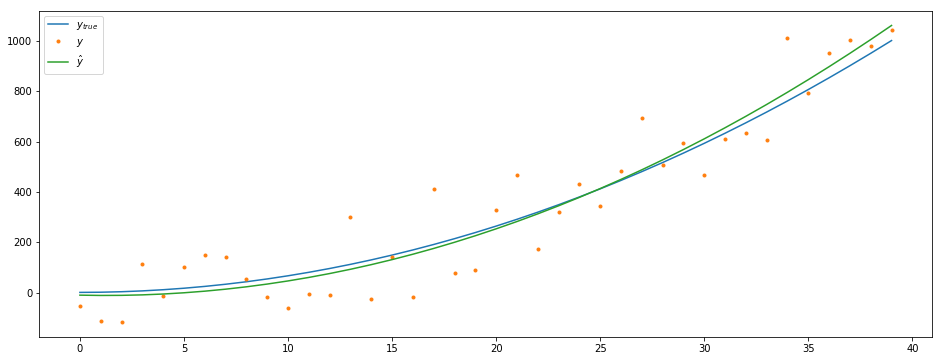

In [18]:
y_hat = X @ beta

plt.figure(figsize=(16,6))
plt.plot(y_true)
plt.plot(y, '.')
plt.plot(y_hat)
plt.legend(['$y_{true}$',
            '$y$', 
            r'$\hat{y}$']);

Alternatively, and arguably more elegantly, one can use `R`-style formulas together with `pandas` data frames:

In [19]:
import statsmodels.formula.api as smf

df = pd.DataFrame(np.c_[x, x**2, y], 
                  columns=['x1', 'x2', 'y'])  # leaving out the intercept, implied
result2 = smf.ols('y ~ x1 + x2', data=df).fit()

assert np.allclose(result.params, result2.params)

For more information how these formulas can be specified, see: https://patsy.readthedocs.io/en/latest/formulas.html

### Confidence Intervals
Consider a slightly different example:

In [20]:
x = np.linspace(0, 20, 50)
X = np.c_[(x, np.sin(x), (x - 5)**2)]
X = sm.add_constant(X)  # constant term to accomodate the intercept
beta_true = [5., 0.5, 0.5, -0.02]
y_true = X @ beta_true

y = y_true + stats.norm.rvs(loc=0, scale=0.5, size=len(X))

result = sm.OLS(y, X).fit()

Now let's calculate and draw confidence intervals:

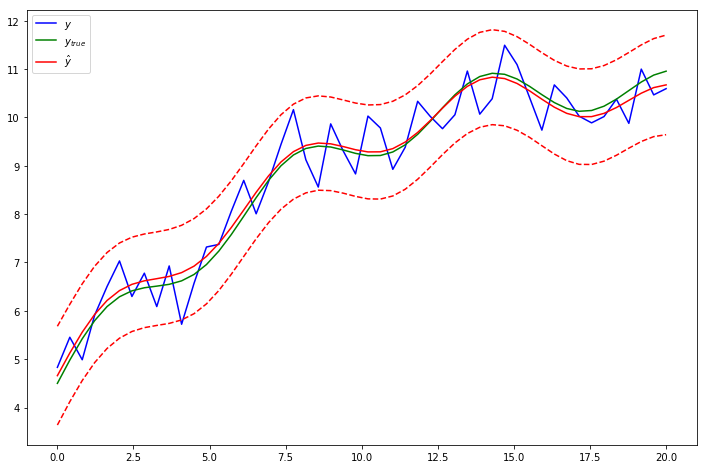

In [21]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(result)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, y, 'b', label="$y$")
ax.plot(x, y_true, 'g', label="$y_{true}$")
ax.plot(x, result.fittedvalues, 'r', label=r"$\hat{y}$")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## ANOVA

Analysis of variance (ANOVA) is used to analyze the differences among three or more *group* means.

In [22]:
moore = sm.datasets.get_rdataset("Moore", "car", cache=True)  # load data
data = moore.data
data = data.rename(columns={"partner.status" : "partner_status"})  # make name pythonic
data.loc[:10]

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36
5,low,6,low,18
6,low,12,medium,51
7,low,4,medium,44
8,low,13,low,31
9,low,12,low,36


In [23]:
moore_lm = smf.ols('conformity ~ C(fcategory, Sum) * C(partner_status, Sum)', 
                   data=data).fit()  # C sets contrasts for a factor
sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN


For an interpretation and a more detailed example, please see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/interactions_anova.html

## Graphics
Basic graphing tools relevant for statistics are included: Goodness of fit, Correlation, Functional, Regression, Time Series, and others.

### Q–Q plot
A Q-Q plot ("Q" stands for quantiles, contiguous intervals with equal probabilities) is a probability plot comparing two probability distributions by plotting their quantiles against each other. If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line $y = x$. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line $y = x$. 

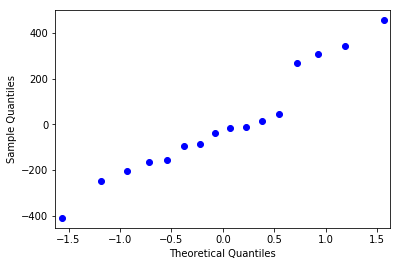

In [24]:
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
mod_fit = sm.OLS(data.endog, data.exog).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)

### Correlation Matrix

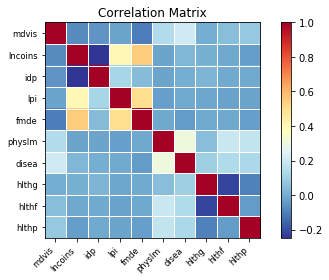

In [25]:
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names);

### Mosaic / Tree Map

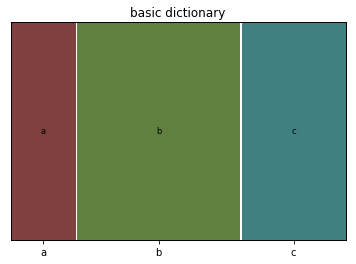

In [26]:
from statsmodels.graphics.mosaicplot import mosaic

data = {'a': 10, 'b': 25, 'c': 16}
mosaic(data, title='basic dictionary');

   gender  pet
0    male  cat
1    male  dog
2    male  dog
3  female  cat
4  female  dog
5  female  cat


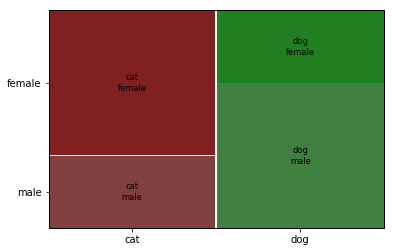

In [27]:
gender = ['male', 'male', 'male', 'female', 'female', 'female']
pet = ['cat', 'dog', 'dog', 'cat', 'dog', 'cat']
data = pd.DataFrame({'gender': gender, 'pet': pet})
print(data)

mosaic(data, ['pet', 'gender']);

## Further Reading

Many more sophisticated functions are provided by statsmodels.stats:

* Residual Diagnostics and Specification Tests (e.g. "Breush-Pagan Lagrange Multiplier test for heteroscedasticity")
* Outliers and influence measures
* Sandwich Robust Covariances
* Goodness of Fit Tests and Measures
* Non-Parametric Tests (e.g. "McNemar test")
* Interrater Reliability and Agreement (e.g. "Cohen’s Kappa")
* Multiple Tests and Multiple Comparison Procedures (e.g. "Tukey test")
* $t$-tests with frequency weights
* Power and Sample Size Calculations
* Hypothesis testing, confidence intervals and effect size for *proportions*
* Moment Helpers (i.e. ensuring a proper covariance matrix)

For more information, see: http://statsmodels.sourceforge.net/stable/stats.html